### Importing libraries / setting up Twitter API

In [7]:
import tweepy
import twitter_api_cred
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from TwitterSearch import TwitterSearch, TwitterSearchOrder, TwitterSearchException

# setup my keys and tokens
consumer_key = twitter_api_cred.consumer_key
consumer_key_secret = twitter_api_cred.consumer_key_secret
access_token = twitter_api_cred.access_token
access_token_secret = twitter_api_cred.access_token_secret

#get access to twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Public Tweets
### Using Twitter API to get tweets 

In [12]:
# setup API to get public tweets containing the list of key words ['politics','election','2020','biden','trump','harris','vp']
public_tweets = api.search(['election','biden','trump'], count = 1000, lang="en")

# setup API to get Donald Trump tweets
trump_posts = api.user_timeline(screen_name="realDonaldTrump", count = 1000, lang ="en", tweet_mode="extended")

# setup API to get Joe Biden tweets
biden_posts = api.user_timeline(screen_name="JoeBiden", count = 1000, lang ="en", tweet_mode="extended")


### Creating functions to clean tweets

In [13]:
# function to clean the tweet text
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub(':', '', text) # Removing ':' 
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('"', '', text) # Removing '"' 
    text = re.sub('_', '', text) # Removing '_'
    text = re.sub('https', '', text)
    text = re.sub('co', '', text)
    return text

# function to get the subjectivity of the tweet
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get the polarity of the tweet
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# function to get the analysis of polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


### Importing public tweets and producing word cloud

Show the 5 recent tweets:

1) RT @SethAbramson: I mean Jesus Christ how does Biden now go and *debate* a man who literally called for the election to be stolen

We've re…

2) RT @Timcast: Here is the election night primer from Democrats

If Biden wins on election night we call it for Biden

If Trump wins on elect…

3) RT @RepAdamSchiff: The Trump Administration announced they're ending election security briefings for Congress.

Now, it appears they suppre…

4) RT @FiveThirtyEight: The RNC hasn’t boosted President Trump enough to meaningfully improve his odds of winning the election. https://t.co/p…

5) RT @Timcast: Here is the election night primer from Democrats

If Biden wins on election night we call it for Biden

If Trump wins on elect…



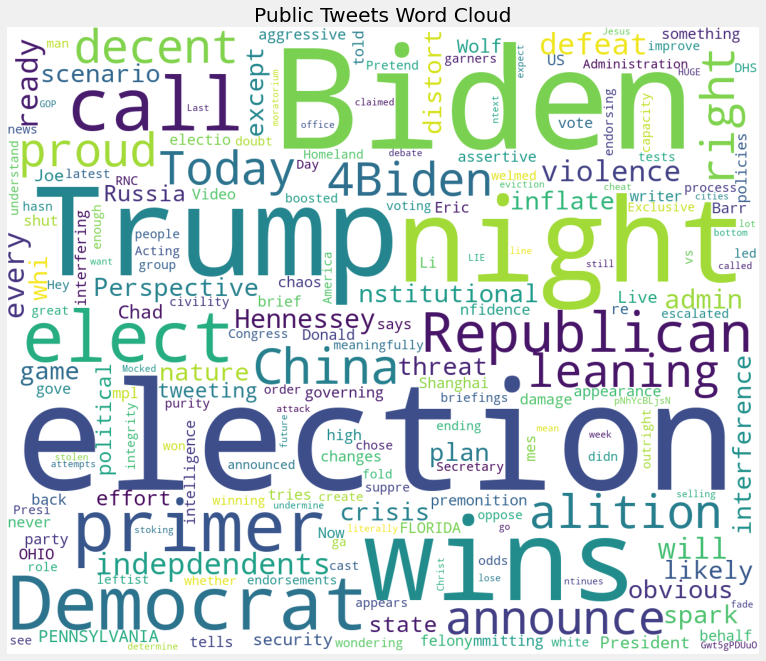

In [15]:
#  Print the last 5 tweets of public tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in public_tweets[:5]:
    #results.append(tweet)
    print(str(i) +') '+ tweet.text + '\n')
    i= i+1
    
#results
public_tweets_df = pd.DataFrame([tweet.text for tweet in public_tweets], columns=['Tweets'])
public_tweets_df['Tweets'] = public_tweets_df['Tweets'].apply(cleanTxt)
public_tweets_df['Subjectivity'] = public_tweets_df['Tweets'].apply(getSubjectivity)
public_tweets_df['Polarity'] = public_tweets_df['Tweets'].apply(getPolarity)
public_tweets_df.head(10)

bigstring = ' '.join([tweets for tweets in public_tweets_df['Tweets']])
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.title('Public Tweets Word Cloud')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig("public_tweets_word_cloud.png")


### Producing scatter plot of subjectivity and polarity of public tweets

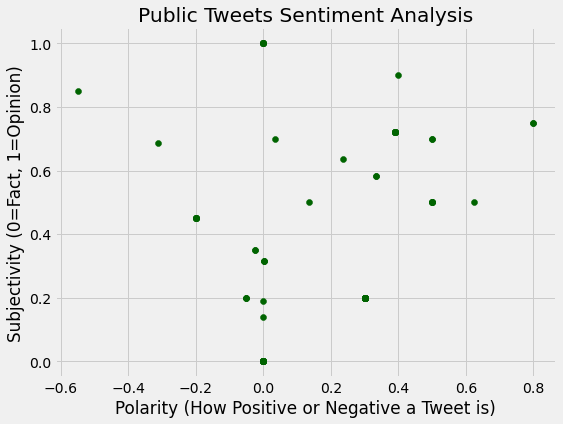

In [16]:
# public tweets subjectivity and polarity analysis
public_tweets_df['Analysis'] = public_tweets_df['Polarity'].apply(getAnalysis)

plt.figure(figsize=(8,6)) 
for i in range(0, public_tweets_df.shape[0]):
    plt.scatter(public_tweets_df["Polarity"][i], public_tweets_df["Subjectivity"][i], color='darkgreen') 
plt.title('Public Tweets Sentiment Analysis') 
plt.xlabel('Polarity (How Positive or Negative a Tweet is)') 
plt.ylabel('Subjectivity (0=Fact, 1=Opinion)') 
plt.savefig("public_tweets_subjectivity_polarity_analysis.png", bbox_inches="tight")
plt.show();


### Producing bar chart of public tweets sentiment analysis

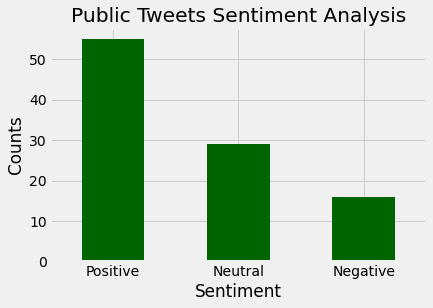

In [17]:
# creating bar chart of sentiment analysis of public tweets

plt.title('Public Tweets Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
public_tweets_df['Analysis'].value_counts().plot(kind = 'bar', color='darkgreen')
plt.xticks(rotation=0)
plt.savefig("public_tweets_sentiment_analysis.png", bbox_inches="tight")
plt.show();


### Producting histogram of public tweets polarity analysis

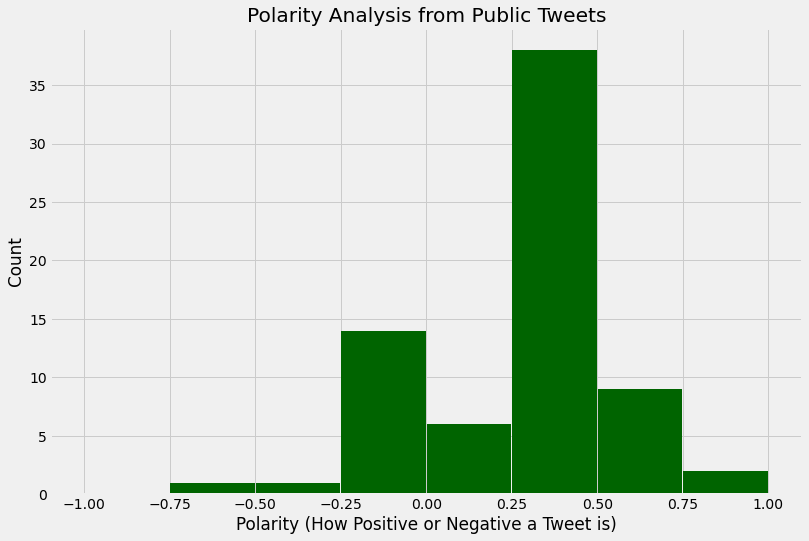

In [18]:
# public tweets polarity analysis
public_tweets_polarity_df = public_tweets_df[public_tweets_df.Polarity != 0]
public_tweets_polarity_df = public_tweets_polarity_df[["Polarity", "Tweets"]]
public_tweets_polarity_df

fig, ax = plt.subplots(figsize=(12, 8))
# Plot histogram with break at zero
public_tweets_polarity_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="darkgreen", rwidth=.99)

plt.title("Polarity Analysis from Public Tweets")
plt.ylabel("Count")
plt.xlabel("Polarity (How Positive or Negative a Tweet is)")
plt.show()
fig.savefig("public_tweets_polarity_analysis.png", bbox_inches="tight")

### Producing histogram of public tweets subjectivity analysis

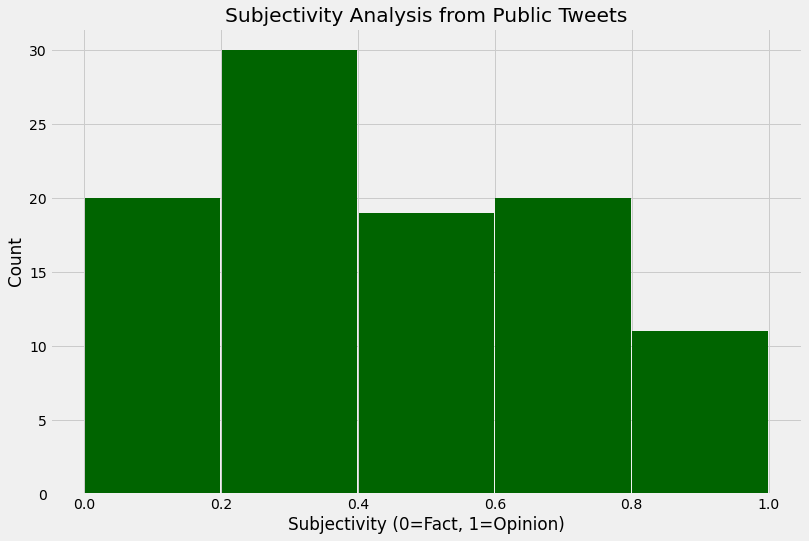

In [19]:
# public tweets subjectivity analysis
public_tweets_Subjectivity_df = public_tweets_df[["Subjectivity", "Tweets"]]
public_tweets_Subjectivity_df
fig, ax = plt.subplots(figsize=(12, 8))

public_tweets_Subjectivity_df.hist(bins=5,
             ax=ax,
             color="darkgreen", rwidth=.99)

plt.title("Subjectivity Analysis from Public Tweets")
plt.ylabel("Count")
plt.xlabel("Subjectivity (0=Fact, 1=Opinion)")
plt.show()
fig.savefig("public_tweets_subjectivity_analysis.png", bbox_inches="tight")

# Donald Trump Tweets
### Importing Trump tweets and producing word cloud

Show the 5 recent tweets:

1) Do you notice that any time Fake News Suppression Polls are put out, like @FoxNews, the Stock Market goes DOWN. We are going to WIN!

2) .@FoxNews Polls are, as in the past, Fake News. They have been from the beginning, way off in 2016. Get a new pollster. I believe we are leading BIG!

3) ....after you Vote, which it should not, that Ballot will not be used or counted in that your vote has already been cast &amp; tabulated. YOU ARE NOW ASSURED THAT YOUR PRECIOUS VOTE HAS BEEN COUNTED, it hasn’t been “lost, thrown out, or in any way destroyed”. GOD BLESS AMERICA!!!

4) .....go to your Polling Place to see whether or not your Mail In Vote has been Tabulated (Counted). If it has you will not be able to Vote &amp; the Mail In System worked properly. If it has not been Counted, VOTE (which is a citizen’s right to do). If your Mail In Ballot arrives....

5) Based on the massive number of Unsolicited &amp; Solicited Ballots that will be sent to potential Voters 

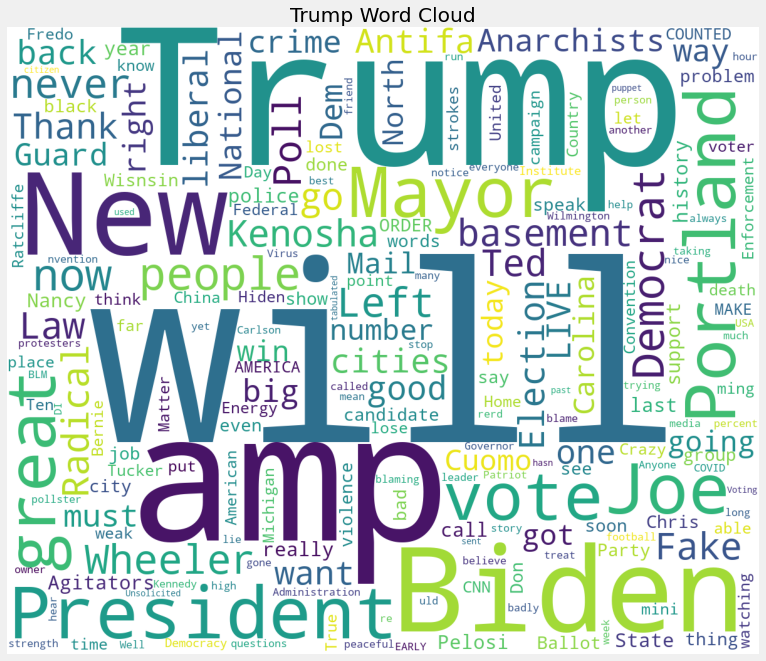

In [20]:
# donald trump

print("Show the 5 recent tweets:\n")
i=1
for tweet in trump_posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

trump_tweets = pd.DataFrame([tweet.full_text for tweet in trump_posts], columns=['Tweets'])
trump_tweets.head(10)

# Clean the tweets
trump_tweets['Tweets'] = trump_tweets['Tweets'].apply(cleanTxt)

# Create two new columns 'Subjectivity' & 'Polarity'
trump_tweets['Subjectivity'] = trump_tweets['Tweets'].apply(getSubjectivity)
trump_tweets['Polarity'] = trump_tweets['Tweets'].apply(getPolarity)


bigstring = ' '.join([twts for twts in trump_tweets['Tweets']])
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.title('Trump Word Cloud')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig("trump_word_cloud.png", bbox_inches="tight")

### producing scatter plot of subjectivity and polarity analysis of Trump tweets

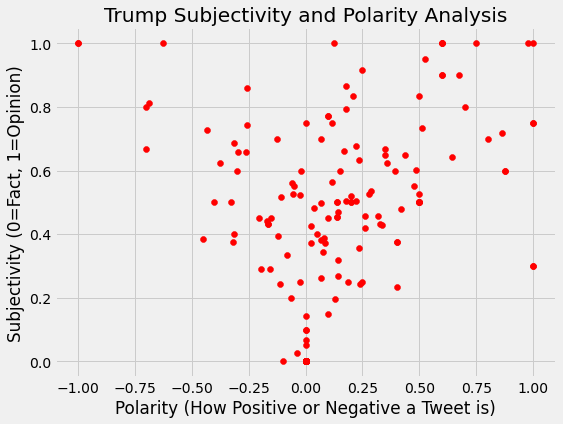

In [21]:
# trump subjectivity and polarity analysis
trump_tweets['Analysis'] = trump_tweets['Polarity'].apply(getAnalysis)

plt.figure(figsize=(8,6)) 
for i in range(0, trump_tweets.shape[0]):
    plt.scatter(trump_tweets["Polarity"][i], trump_tweets["Subjectivity"][i], color='Red') 
plt.title('Trump Subjectivity and Polarity Analysis') 
plt.xlabel('Polarity (How Positive or Negative a Tweet is)') 
plt.ylabel('Subjectivity (0=Fact, 1=Opinion)') 
plt.savefig("trump_subjectivity_polarity_analysis.png", bbox_inches="tight")
plt.show();

### Producing bar chart of sentiment analysis of Trump tweets

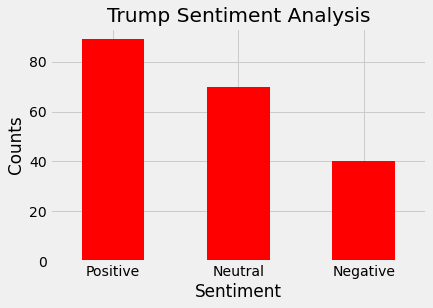

In [22]:
# creating bar chart of sentiment analysis of Trump tweets

plt.title('Trump Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trump_tweets['Analysis'].value_counts().plot(kind = 'bar', color='red')
plt.xticks(rotation=0)
plt.savefig("trump_sentiment_analysis.png", bbox_inches="tight")
plt.show();


### Producing Polarity analysis of Trump tweets

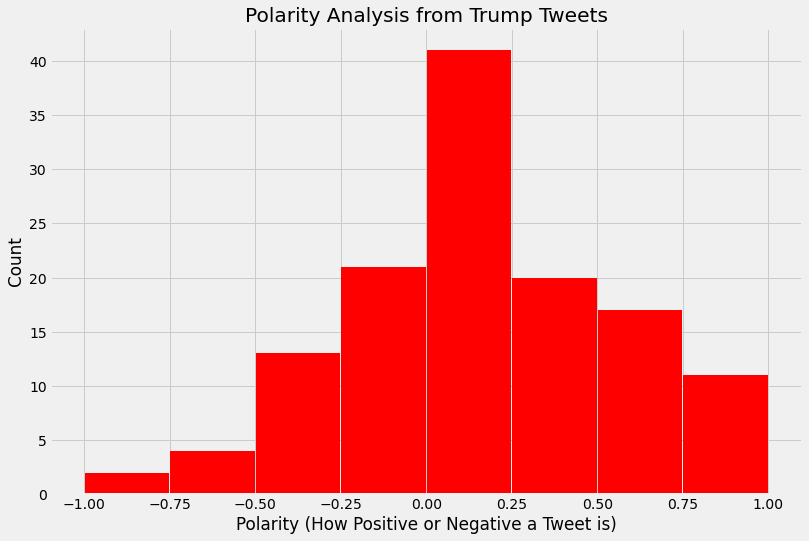

In [23]:
# trump polarity analysis
trump_tweets_polarity_df = trump_tweets[trump_tweets.Polarity != 0]
trump_tweets_polarity_df = trump_tweets_polarity_df[["Polarity", "Tweets"]]
trump_tweets_polarity_df
fig, ax = plt.subplots(figsize=(12, 8))

# Plot histogram with break at zero
trump_tweets_polarity_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red", rwidth=.99)

plt.title("Polarity Analysis from Trump Tweets")
plt.ylabel("Count")
plt.xlabel("Polarity (How Positive or Negative a Tweet is)")
plt.show()
fig.savefig("trump_polarity_analysis.png", bbox_inches="tight")

### Producing subjectivity analysis of Trump tweets

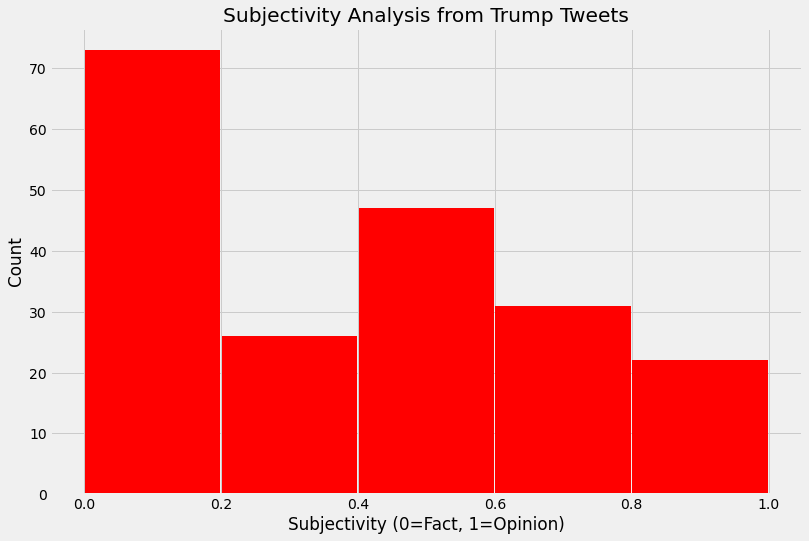

In [24]:
# trump subjectivity analysis
trump_tweets_Subjectivity_df = trump_tweets[["Subjectivity", "Tweets"]]
trump_tweets_Subjectivity_df
fig, ax = plt.subplots(figsize=(12, 8))

trump_tweets_Subjectivity_df.hist(bins=5,
             ax=ax,
             color="red", rwidth=.99)

plt.title("Subjectivity Analysis from Trump Tweets")
plt.ylabel("Count")
plt.xlabel("Subjectivity (0=Fact, 1=Opinion)")
plt.show()
fig.savefig("trump_subjectivity_analysis.png", bbox_inches="tight")

# Joe Biden Tweets
### Importing Biden tweets and producing word cloud

Show the 5 recent tweets:

1) Right now, classrooms should be humming with excitement for a new year and students’ hopes for their futures.

Instead, many are silent and empty because President Trump didn’t do his job.

America’s families are paying the price for his failures.

2) I've always believed we're at our best when we act as one America. It's time for us to come together, propel our nation across this turbulent threshold, and build a better future for all.

3) Time and time again, President Trump has refused to stand up to Putin. His silence on the poisoning of Mr. Navalny is just the latest example.

As president, I'll do what Trump won't: hold the Putin regime accountable for its crimes. https://t.co/z11YyV6lq0

4) I’ve released 21 years of my tax returns. 

What are you hiding, @realDonaldTrump? https://t.co/aQs6Hlox0P

5) They're rooting for chaos and violence because they think it helps them win a second term.

Now ask yourself, is that really who you think should be runn

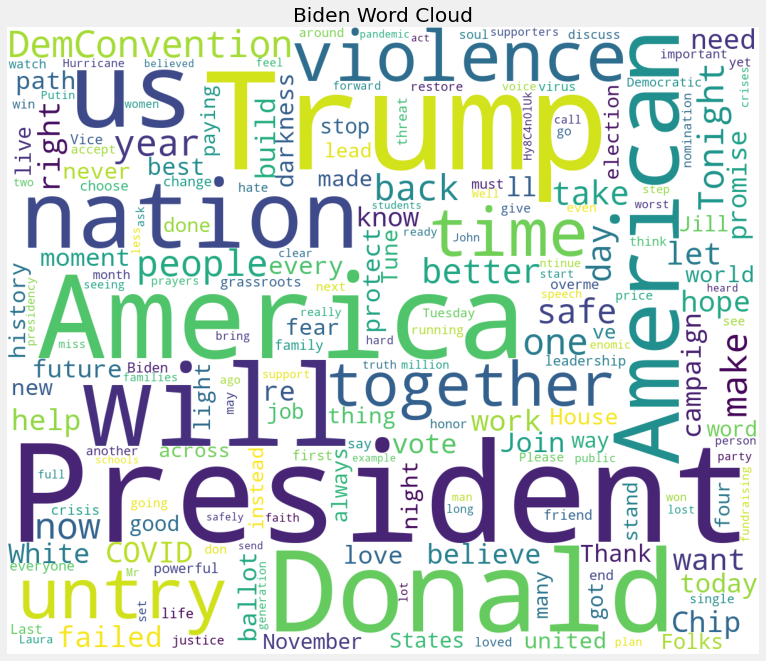

In [25]:
# joe biden

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in biden_posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

biden_tweets_df = pd.DataFrame([tweet.full_text for tweet in biden_posts], columns=['Tweets'])


# Clean the tweets
biden_tweets_df['Tweets'] = biden_tweets_df['Tweets'].apply(cleanTxt)



# Create two new columns 'Subjectivity' & 'Polarity'
biden_tweets_df['Subjectivity'] = biden_tweets_df['Tweets'].apply(getSubjectivity)
biden_tweets_df['Polarity'] = biden_tweets_df['Tweets'].apply(getPolarity)


#create word cloud
from wordcloud import WordCloud, STOPWORDS
bigstring = ' '.join([twts for twts in biden_tweets_df['Tweets']])
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.title('Biden Word Cloud')
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig("biden_word_cloud", bbox_inches="tight")

### Producing subjectivity and polarity analysis of Biden tweets

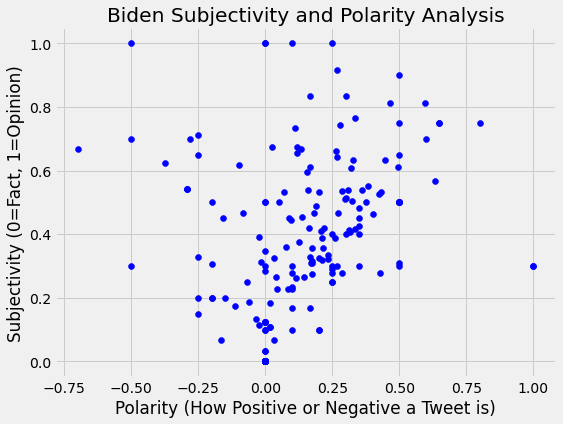

In [26]:
# biden subjectivity and polarity analysis
biden_tweets_df['Analysis'] = biden_tweets_df['Polarity'].apply(getAnalysis)
# Show the dataframe
biden_tweets_df

plt.figure(figsize=(8,6)) 
for i in range(0, biden_tweets_df.shape[0]):
    plt.scatter(biden_tweets_df["Polarity"][i], biden_tweets_df["Subjectivity"][i], color='Blue') 
plt.title('Biden Subjectivity and Polarity Analysis') 
plt.xlabel('Polarity (How Positive or Negative a Tweet is)') 
plt.ylabel('Subjectivity (0=Fact, 1=Opinion)') 
plt.savefig("biden_subjectivity_polarity_analysis.png", bbox_inches="tight")
plt.show();


### Producing sentiment analysis of Biden tweets

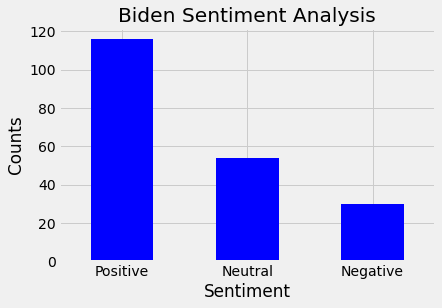

In [27]:
# biden sentiment analysis
plt.title('Biden Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
biden_tweets_df['Analysis'].value_counts().plot(kind = 'bar', color='blue')
plt.xticks(rotation=0)
plt.savefig("biden_sentiment_analysis.png", bbox_inches="tight")
plt.show();

### Producing histogram of polarity analysis of Biden tweets

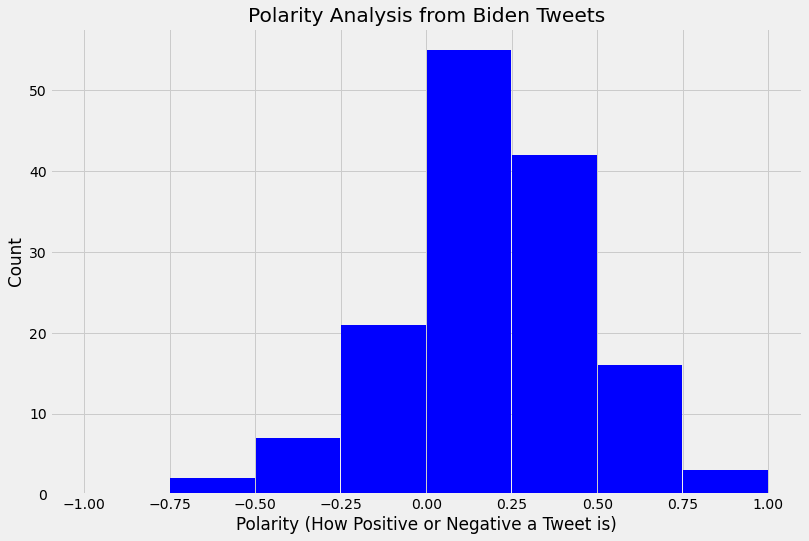

In [28]:
# biden polarity analysis
biden_tweets_polarity_df = biden_tweets_df[biden_tweets_df.Polarity != 0]
biden_tweets_polarity_df = biden_tweets_polarity_df[["Polarity", "Tweets"]]
biden_tweets_polarity_df
fig, ax = plt.subplots(figsize=(12, 8))

# Plot histogram with break at zero
biden_tweets_polarity_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue", rwidth=.99)

plt.title("Polarity Analysis from Biden Tweets")
plt.ylabel("Count")
plt.xlabel("Polarity (How Positive or Negative a Tweet is)")
plt.show()
fig.savefig("biden_polarity_analysis.png", bbox_inches="tight")

### Producing histogram of subjectivity analysis of Biden tweets

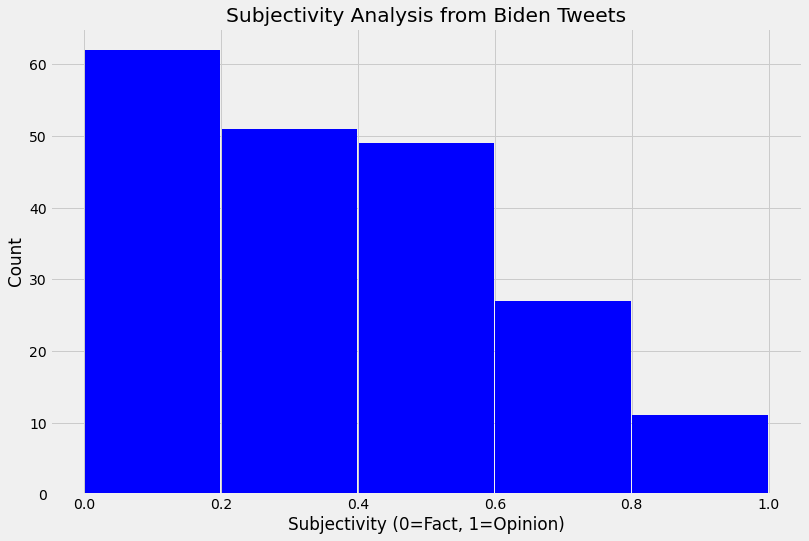

In [29]:
# biden subjectivity analysis
biden_tweets_Subjectivity_df = biden_tweets_df[["Subjectivity", "Tweets"]]
biden_tweets_Subjectivity_df
fig, ax = plt.subplots(figsize=(12, 8))

biden_tweets_Subjectivity_df.hist(bins=5,
             ax=ax,
             color="blue", rwidth=.99)

plt.title("Subjectivity Analysis from Biden Tweets")
plt.ylabel("Count")
plt.xlabel("Subjectivity (0=Fact, 1=Opinion)")
plt.show()
fig.savefig("biden_subjectivity_analysis.png", bbox_inches="tight")